In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data_dir='..\DATA\cell_images'

In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
from matplotlib.image import imread

In [5]:
test_path=data_dir+'\\test\\'
train_path=data_dir+'\\train\\'

In [6]:
dim1=[]
dim2=[]

for image_filename in os.listdir(test_path+'uninfected'):
    
    img=imread(test_path+'uninfected\\'+image_filename)
    d1,d2,colors=img.shape
    dim1.append(d1)
    dim2.append(d2)

In [7]:
np.mean(dim1)

130.92538461538462

In [8]:
image_shape=(130,130,3)

In [9]:
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [10]:
para_cell=train_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [11]:
para_cell

'..\\DATA\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

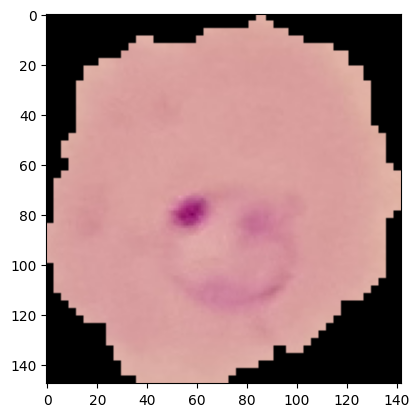

In [14]:
plt.imshow(imread(para_cell))

In [16]:
os.listdir(train_path+'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [22]:
uninfected_cell=train_path+'uninfected\\'+'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [23]:
uninfected_cell

'..\\DATA\\cell_images\\train\\uninfected\\C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [25]:
imread(uninfected_cell).shape

(139, 160, 3)

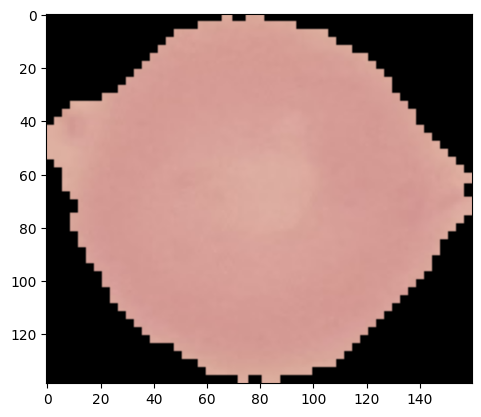

In [27]:
plt.imshow(imread(uninfected_cell))

In [28]:
uninfected_cell=imread(uninfected_cell)

In [30]:
uninfected_cell.shape

(139, 160, 3)

In [32]:
len(os.listdir(train_path+'parasitized'))

12480

In [33]:
len(os.listdir(train_path+'uninfected'))

12480

In [34]:
dim1=[]
dim2=[]

for image_filename in os.listdir(test_path+'uninfected'):
    
    img=imread(test_path+'uninfected\\'+image_filename)
    d1,d2,colors=img.shape
    dim1.append(d1)
    dim2.append(d2)

In [37]:
sns.jointplot(dim1,dim2)

TypeError: jointplot() takes from 0 to 1 positional arguments but 2 were given

In [38]:
np.mean(dim1)

130.92538461538462

In [39]:
image_shape=(130,130,3)

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
image_gen=ImageDataGenerator(rotation_range=20,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            fill_mode='nearest')

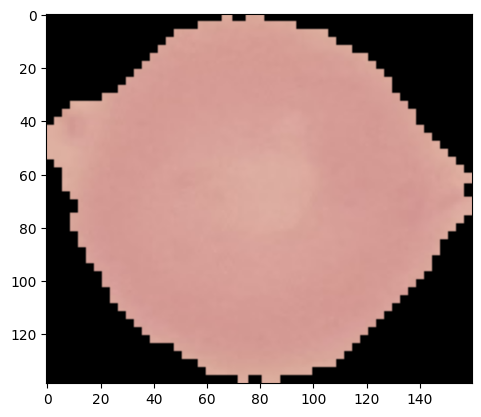

In [42]:
plt.imshow(uninfected_cell)

In [44]:
para_img=imread(para_cell)

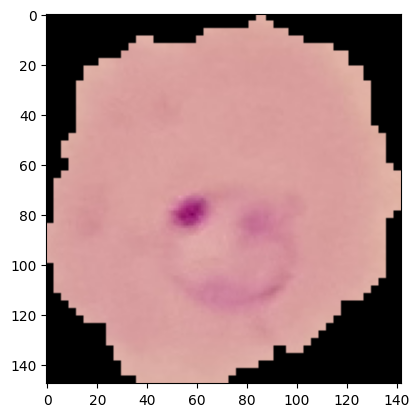

In [46]:
plt.imshow(para_img)

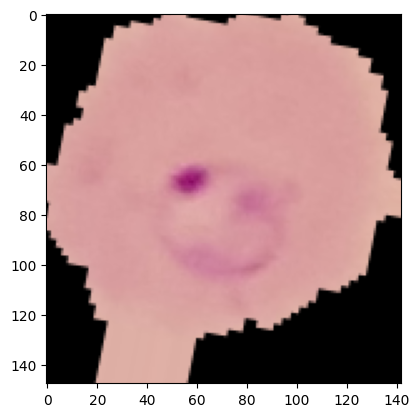

In [47]:
plt.imshow(image_gen.random_transform(para_img))

In [48]:
train_path

'..\\DATA\\cell_images\\train\\'

In [49]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [50]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [51]:
from tensorflow.keras.models import Sequential

In [53]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [54]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,
                activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,
                activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,
                activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',
             metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

In [57]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [58]:
batch_size=16

In [59]:
train_image_gen=image_gen.flow_from_directory(train_path,
                                             target_size=image_shape[:2],
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 24958 images belonging to 2 classes.


In [62]:
test_image_gen=image_gen.flow_from_directory(test_path,
                                             target_size=image_shape[:2],
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary',
                                            shuffle=False)

Found 2600 images belonging to 2 classes.


In [64]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [70]:
results=model.fit(train_image_gen,epochs=10,
                           validation_data=test_image_gen,
                           callbacks=[early_stop])

Epoch 1/10
 828/1560 [==============>...............] - ETA: 5:35 - loss: 0.9880 - accuracy: 0.8962

KeyboardInterrupt: 

In [66]:
from tensorflow.keras.models import load_model

In [67]:
model=load_model('malaria_detector.h5')

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0